# *LOADING OR LINKING DATA*

In [ ]:
from google.colab import drive#
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# remember to escape white spaces
%cd /gdrive/My\Drive/

/gdrive/MyDrive


## LOADING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread
import os

data_dir = "Data"
os.listdir(data_dir)

['train', 'test']

In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread
import os



## PROCESSING AND ANALYZING DATA

In [ ]:
test_path = data_dir + "/test"
train_path = data_dir + "/train"

In [ ]:
os.listdir(train_path)

['COVID19', 'NORMAL', 'PNEUMONIA']

In [ ]:
os.listdir(test_path)

['NORMAL', 'PNEUMONIA', 'COVID19']

In [ ]:
os.listdir(train_path + '/COVID19')[0]

'COVID19(128).jpg'

In [ ]:
covid_cell = train_path + '/COVID19' + '/COVID19(0).jpg'

In [ ]:
imread(covid_cell).shape

(2000, 2000)

## VISUALIZATION AND ANALYZATION OF DATA

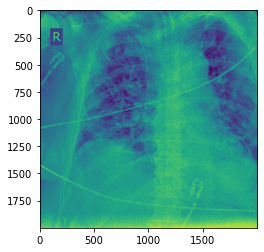

In [ ]:
plt.imshow(imread(covid_cell))

In [ ]:
uninfected_cell = train_path + '/NORMAL/' + os.listdir(train_path + '/NORMAL/')[0]

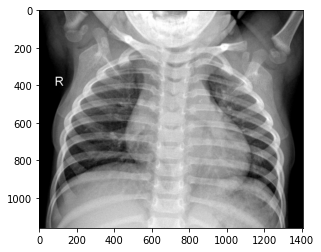

In [ ]:
plt.imshow(imread(uninfected_cell))

In [ ]:
p_cell = train_path + '/PNEUMONIA/' + os.listdir(train_path + '/PNEUMONIA/')[0]

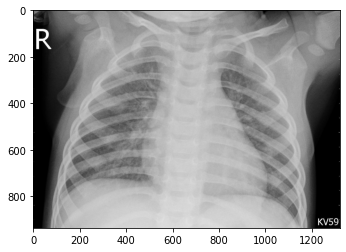

In [ ]:
plt.imshow(imread(p_cell))

### Checking the Number of Images

In [ ]:
len(os.listdir(train_path + '/NORMAL'))

1272

In [ ]:
len(os.listdir(train_path + '/PNEUMONIA'))

3418

In [ ]:
len(os.listdir(train_path + '/COVID19'))

460

In [ ]:
len(os.listdir(test_path + '/NORMAL'))

317

In [ ]:
len(os.listdir(test_path + '/PNEUMONIA'))

855

In [ ]:
len(os.listdir(test_path + '/COVID19'))

116

## DATA CLEANING

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


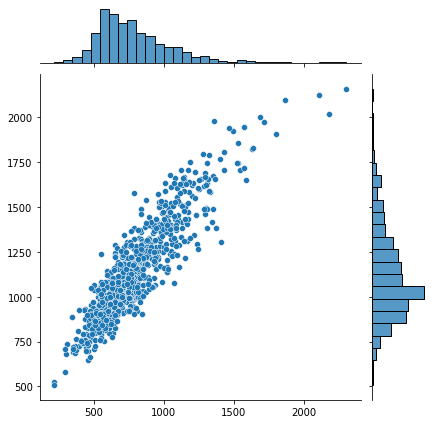

In [ ]:

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + '/PNEUMONIA'):
    img = imread(test_path + '/PNEUMONIA/' +image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    
sns.jointplot(dim1, dim2)

In [ ]:
img.shape

(1096, 1232, 3)

In [ ]:
np.mean(dim1)

783.1964912280702

In [ ]:
np.mean(dim2)

1130.3637426900584

### For COVID cases we have the min size around 270 * 270 hence we are restricting to 400 * 400

In [ ]:
image_size = (400,400,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [ ]:
train_generator = generator.flow_from_directory (
    train_path,
    target_size=image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

test_generator = generator.flow_from_directory (
    test_path,
    target_size=image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)

Found 5150 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

## MODEL 1

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1267232)           0         
_________________________________________________________________
dense (Dense)                (None, 150)               190084950 
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 453       
Total params: 190,086,299
Trainable params: 190,086,299
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, mode='min')

In [ ]:
results = model.fit_generator(train_generator, epochs=10, validation_data=test_generator,
                             callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 2407s 15s/step - loss: 4.4227 - accuracy: 0.7833 - val_loss: 0.3703 - val_accuracy: 0.8696
Epoch 2/10
161/161 [==============================] - 287s 2s/step - loss: 0.3787 - accuracy: 0.8464 - val_loss: 0.3746 - val_accuracy: 0.8797
Epoch 3/10
161/161 [==============================] - 286s 2s/step - loss: 0.3428 - accuracy: 0.8658 - val_loss: 0.4173 - val_accuracy: 0.8587


In [ ]:
metrics = pd.DataFrame(model.history.history)

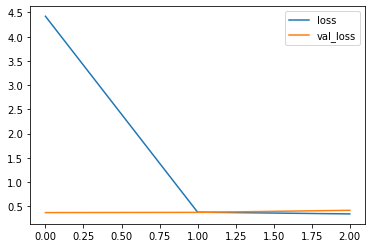

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
pred = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions = pred > 0.5

In [ ]:
predictions = np.argmax(predictions, axis = 1)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_true=test_generator.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       116
           1       0.70      0.84      0.76       317
           2       0.93      0.88      0.90       855

    accuracy                           0.85      1288
   macro avg       0.81      0.80      0.80      1288
weighted avg       0.86      0.85      0.85      1288



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

## MODEL 2

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=image_size))
model2.add(MaxPool2D(pool_size = (2,2)))

model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=image_size))
model2.add(MaxPool2D(pool_size = (2,2)))


model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=image_size))
model2.add(MaxPool2D(pool_size = (2,2)))

model2.add(Flatten())

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 199, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 197, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)            

In [ ]:
results = model2.fit_generator(train_generator, epochs=10, validation_data=test_generator,callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 289s 2s/step - loss: 0.7058 - accuracy: 0.7212 - val_loss: 0.5841 - val_accuracy: 0.7896
Epoch 2/10
161/161 [==============================] - 288s 2s/step - loss: 0.4535 - accuracy: 0.8256 - val_loss: 0.3773 - val_accuracy: 0.8797
Epoch 3/10
161/161 [==============================] - 287s 2s/step - loss: 0.4053 - accuracy: 0.8421 - val_loss: 0.3492 - val_accuracy: 0.8766
Epoch 4/10
161/161 [==============================] - 286s 2s/step - loss: 0.3682 - accuracy: 0.8557 - val_loss: 0.3036 - val_accuracy: 0.8929
Epoch 5/10
161/161 [==============================] - 286s 2s/step - loss: 0.3497 - accuracy: 0.8649 - val_loss: 0.3270 - val_accuracy: 0.8789
Epoch 6/10
161/161 [==============================] - 287s 2s/step - loss: 0.3188 - accuracy: 0.8777 - val_loss: 0.3141 - val_accuracy: 0.8866


In [ ]:
metrics = pd.DataFrame(model2.history.history)

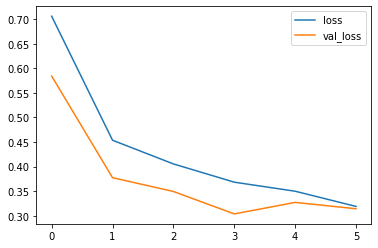

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
pred = model2.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions = pred > 0.5

In [ ]:
predictions = np.argmax(predictions, axis = 1)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
print(classification_report(y_true=test_generator.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       116
           1       0.79      0.84      0.82       317
           2       0.94      0.91      0.93       855

    accuracy                           0.89      1288
   macro avg       0.86      0.88      0.87      1288
weighted avg       0.89      0.89      0.89      1288



## MODEL 3

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=image_size))
model3.add(MaxPool2D(pool_size = (2,2)))


model3.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model3.add(MaxPool2D(pool_size = (2,2)))


model3.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model3.add(MaxPool2D(pool_size = (2,2)))


model3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model3.add(MaxPool2D(pool_size = (2,2)))
model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 64)       

In [ ]:
results = model3.fit_generator(train_generator, epochs=10, validation_data=test_generator,
                             callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 288s 2s/step - loss: 0.5293 - accuracy: 0.7845 - val_loss: 0.3984 - val_accuracy: 0.8261
Epoch 2/10
161/161 [==============================] - 286s 2s/step - loss: 0.3278 - accuracy: 0.8738 - val_loss: 0.3352 - val_accuracy: 0.8874
Epoch 3/10
161/161 [==============================] - 285s 2s/step - loss: 0.3107 - accuracy: 0.8816 - val_loss: 0.2680 - val_accuracy: 0.9053
Epoch 4/10
161/161 [==============================] - 285s 2s/step - loss: 0.2686 - accuracy: 0.8973 - val_loss: 0.3044 - val_accuracy: 0.8820
Epoch 5/10
161/161 [==============================] - 285s 2s/step - loss: 0.2471 - accuracy: 0.9093 - val_loss: 0.2431 - val_accuracy: 0.9045
Epoch 6/10
161/161 [==============================] - 285s 2s/step - loss: 0.2099 - accuracy: 0.9243 - val_loss: 0.2919 - val_accuracy: 0.8967
Epoch 7/10
161/161 [==============================] - 285s 2s/step - loss: 0.2078 - accuracy: 0.9223 - val_loss: 0.2420 - val_accuracy: 0.9068

In [ ]:
metrics = pd.DataFrame(model3.history.history)


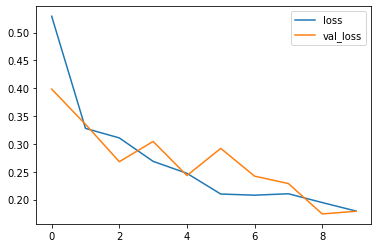

In [ ]:
metrics[['loss', 'val_loss']].plot()


In [ ]:
pred = model3.predict_generator(test_generator)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions = pred > 0.5


In [ ]:
predictions = np.argmax(predictions, axis = 1)

In [ ]:
test_generator.classes


array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
print(classification_report(y_true=test_generator.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       116
           1       0.82      0.95      0.88       317
           2       0.98      0.93      0.95       855

    accuracy                           0.93      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.94      0.93      0.93      1288



## MODEL 4

In [ ]:
from tensorflow.keras import regularizers
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3,3),kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=image_size))
model4.add(MaxPool2D(pool_size = (2,2)))


model4.add(Conv2D(32, kernel_size=(3,3),kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model4.add(MaxPool2D(pool_size = (2,2)))


model4.add(Conv2D(32, kernel_size=(3,3),kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model4.add(MaxPool2D(pool_size = (2,2)))


model4.add(Conv2D(64, kernel_size=(3,3),kernel_regularizer=regularizers.l1(0.001), activation='relu'))
model4.add(MaxPool2D(pool_size = (2,2)))
model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(Dense(3, activation='softmax'))
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)       

In [ ]:
results = model4.fit_generator(train_generator, epochs=10, validation_data=test_generator,
                             callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 287s 2s/step - loss: 1.3899 - accuracy: 0.7689 - val_loss: 0.8512 - val_accuracy: 0.8812
Epoch 2/10
161/161 [==============================] - 285s 2s/step - loss: 0.7619 - accuracy: 0.8670 - val_loss: 0.6452 - val_accuracy: 0.8975
Epoch 3/10
161/161 [==============================] - 285s 2s/step - loss: 0.6288 - accuracy: 0.8734 - val_loss: 0.5531 - val_accuracy: 0.8991
Epoch 4/10
161/161 [==============================] - 285s 2s/step - loss: 0.5449 - accuracy: 0.8835 - val_loss: 0.5115 - val_accuracy: 0.9099
Epoch 5/10
161/161 [==============================] - 285s 2s/step - loss: 0.4705 - accuracy: 0.9019 - val_loss: 0.4496 - val_accuracy: 0.9022
Epoch 6/10
161/161 [==============================] - 285s 2s/step - loss: 0.4359 - accuracy: 0.9016 - val_loss: 0.4087 - val_accuracy: 0.9138
Epoch 7/10
161/161 [==============================] - 285s 2s/step - loss: 0.3968 - accuracy: 0.9144 - val_loss: 0.4060 - val_accuracy: 0.9045

In [ ]:
metrics = pd.DataFrame(model4.history.history)


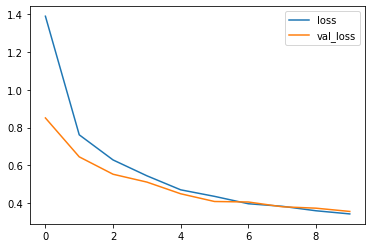

In [ ]:
metrics[['loss', 'val_loss']].plot()



In [ ]:
pred = model4.predict_generator(test_generator)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions = pred > 0.5


In [ ]:
predictions = np.argmax(predictions, axis = 1)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:

print(classification_report(y_true=test_generator.classes, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       116
           1       0.83      0.91      0.87       317
           2       0.95      0.93      0.94       855

    accuracy                           0.92      1288
   macro avg       0.90      0.88      0.89      1288
weighted avg       0.92      0.92      0.92      1288



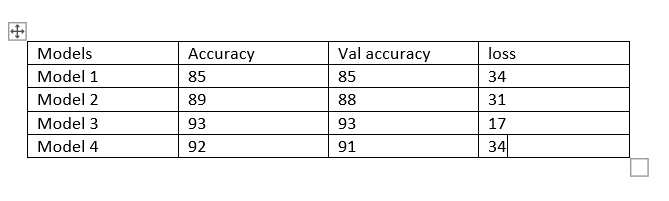